In [1]:
from microsim import schema as ms
from microsim.util import ortho_plot

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(256, 512, 512), scale=(0.02, 0.01, 0.01)),
    output_space={"downscale": 8},
    sample=ms.Sample(labels=[ms.MatsLines(density=1, length=8, azimuth=10, max_r=0.9)]),
    modality=ms.Confocal(pinhole_au=0.4),
    detector=ms.CameraCCD(
        qe=0.82,
        gain=1,
        full_well=18000,  # e
        dark_current=0.0005,  # e/pix/sec
        clock_induced_charge=1,
        read_noise=6,
        bit_depth=12,
        offset=100,
        # not used here
        readout_rate=1,
        photodiode_size=1,
    ),
    settings=ms.Settings(random_seed=100),
    output_path="au1.tif",
)

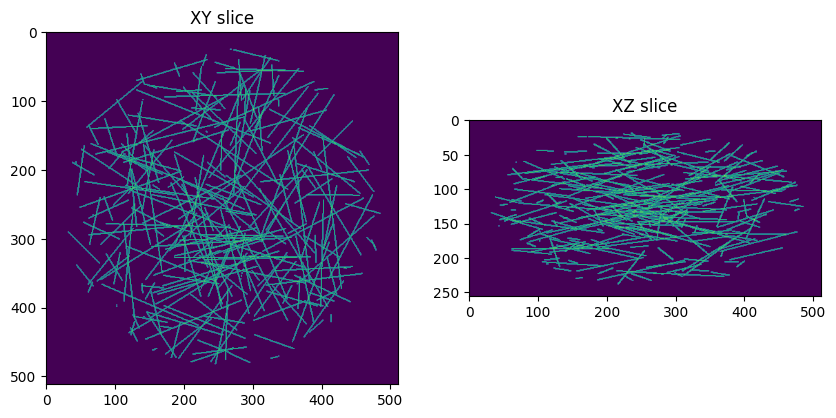

In [2]:
ground_truth = sim.ground_truth()
ortho_plot(ground_truth, mip=True)

making excitation PSF...
making emission PSF...
convolving em_psf with pinhole...


100%|██████████| 257/257 [00:03<00:00, 72.76it/s]


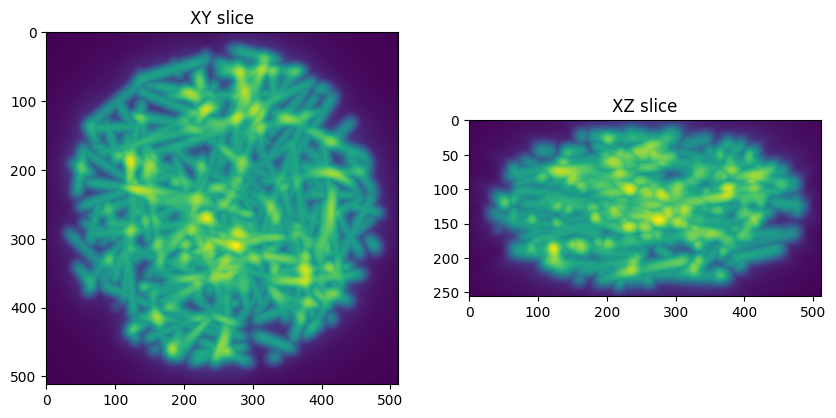

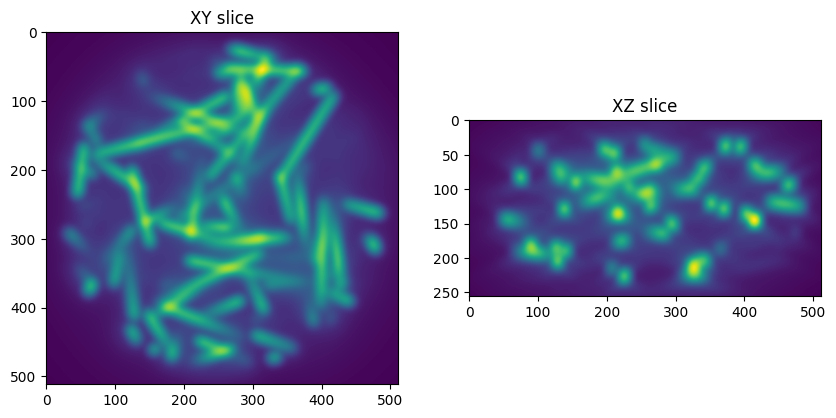

In [3]:
optical_img = sim.optical_image(ground_truth)  # passing ground_truth is optional
ortho_plot(optical_img, mip=True)
ortho_plot(optical_img, mip=False)

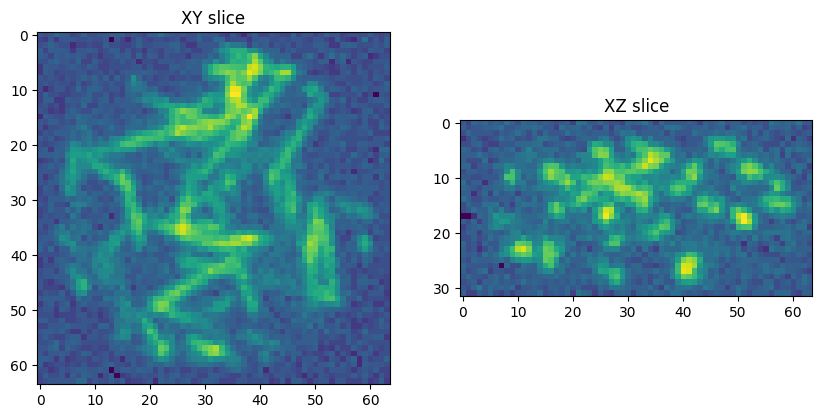

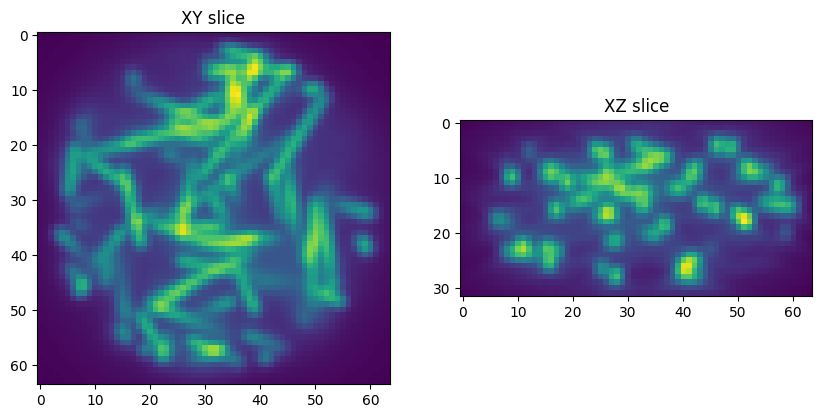

In [4]:
# passing optical_img is optional
digital_image = sim.digital_image(optical_img, with_noise=True)
ortho_plot(digital_image, mip=False)

noise_free_digital_image = sim.digital_image(optical_img, with_noise=False)
ortho_plot(noise_free_digital_image, mip=False)
